<a href="https://colab.research.google.com/github/nathanschoeck/Computer-Vision/blob/main/Image_Transformations_Warping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is Python code for image warping using OpenCV. This code demonstrates how to apply an affine transformation and a perspective transformation to warp an image.

1. Import Libraries

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

2. Apply affine transformation function

In [4]:
def affine_warp(image):
    """
    Apply affine transformation to the image.
    """
    rows, cols, _ = image.shape

    # Define points for the affine transformation
    src_points = np.float32([[50, 50], [200, 50], [50, 200]])
    dst_points = np.float32([[10, 100], [200, 50], [100, 250]])

    # Compute the affine transformation matrix
    affine_matrix = cv2.getAffineTransform(src_points, dst_points)

    # Apply the affine transformation
    warped_image = cv2.warpAffine(image, affine_matrix, (cols, rows))

    return warped_image

3. Apply perspective transformation function

In [5]:
def perspective_warp(image):
    """
    Apply perspective transformation to the image.
    """
    rows, cols, _ = image.shape

    # Define points for the perspective transformation
    src_points = np.float32([[50, 50], [cols - 50, 50], [50, rows - 50], [cols - 50, rows - 50]])
    dst_points = np.float32([[0, 0], [cols, 0], [0, rows], [cols - 100, rows - 100]])

    # Compute the perspective transformation matrix
    perspective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)

    # Apply the perspective transformation
    warped_image = cv2.warpPerspective(image, perspective_matrix, (cols, rows))

    return warped_image

4. Load the input image

In [6]:
image_path = "/Girl_with_a_Pearl_Earring.jpg"  # Replace with your image path
image = cv2.imread(image_path)

5. Apply affine and perspective warping

In [7]:
affine_warped_image = affine_warp(image)
perspective_warped_image = perspective_warp(image)

6. Display the results

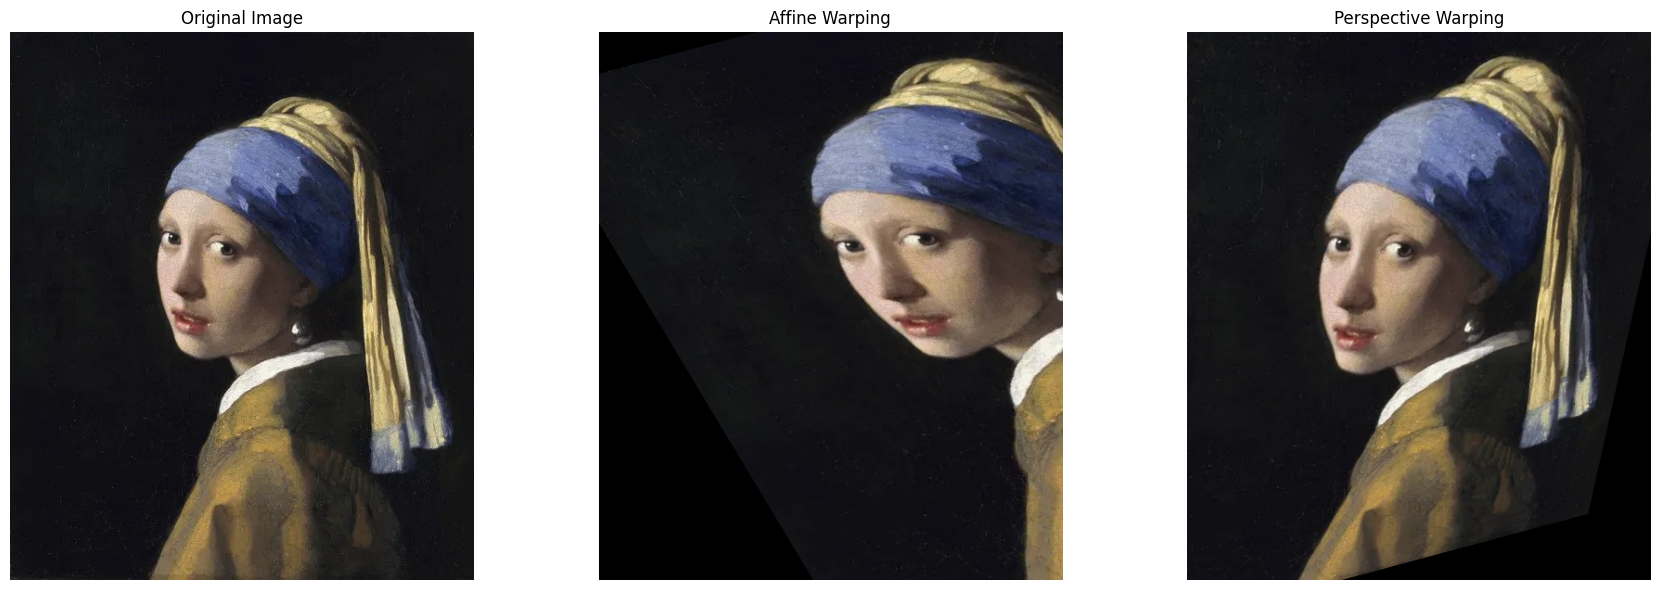

In [8]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(affine_warped_image, cv2.COLOR_BGR2RGB))
plt.title("Affine Warping")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(perspective_warped_image, cv2.COLOR_BGR2RGB))
plt.title("Perspective Warping")
plt.axis("off")

plt.tight_layout()
plt.show()

7. Save the results

In [9]:
cv2.imwrite("affine_warped_image.jpg", affine_warped_image)
cv2.imwrite("perspective_warped_image.jpg", perspective_warped_image)

True